# Notebook 6 : Clustering

This notebook is prepared by Katia Antonenko, based on materials of [Chloé-Agathe Azencott](http://cazencott.info) and [Arthur Imbert](https://github.com/Henley13).



This notebook introduces several clustering techniques.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('font', **{'size': 10}) #  the fontsize for plots (in pt)

## Synthetic datasets

Let's generate three two-dimensional datasets: 
- four separate normally-distributed clusters;
- two noisy moons;
- two nested circles.

In [3]:
from sklearn import datasets

Text(0.5, 1.0, 'Circles')

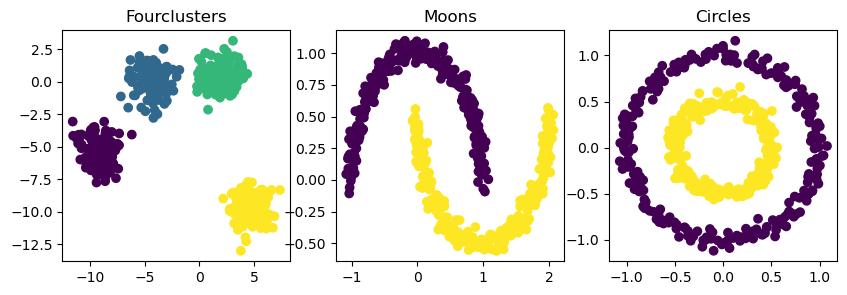

In [4]:
# Number of points
N = 500

fourclusters, fourclusters_labels = datasets.make_blobs(n_samples=N, centers=4, n_features=2, random_state=170)

moons, moons_labels = datasets.make_moons(n_samples=N, noise=0.05, random_state=170)

circles, circles_labels = datasets.make_circles(n_samples=N, factor=.5, noise=.05, random_state=170)

# Data visualization
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

ax[0].scatter(fourclusters[:, 0], fourclusters[:, 1], c=fourclusters_labels)
ax[1].scatter(moons[:, 0], moons[:, 1], c=moons_labels)
ax[2].scatter(circles[:, 0], circles[:, 1], c=circles_labels)

ax[0].set_title('Fourclusters')
ax[1].set_title('Moons')
ax[2].set_title('Circles')

If we assume that the labels are not available, which clustering algorithms can help us to find the clusters, for each dataset?

### KMeans

The objective of the k-means algorithm is to find $K$ clusters (and their $\mu_k$ centroids) so as to **minimize intra-cluster variance** :

\begin{align}
V = \sum_{k = 1}^{K} \sum_{x \in C_k} \frac{1}{|C_k|} (\|x - \mu_k\|^2)
\end{align}

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [5]:
from sklearn import cluster

**FILL THE CODE IN THE NEXT CELL**

In [6]:
### START OF YOUR CODE
# Initialize three KMeans models
# with the numbers of clusters you expect theoretically:
kmeans_fourclusters = cluster.KMeans(n_clusters=4)
kmeans_moons = cluster.KMeans(n_clusters=2)
kmeans_circles = cluster.KMeans(n_clusters=2)
### END OF YOUR CODE

# Fit the models to the datasets 
kmeans_fourclusters.fit(fourclusters)
kmeans_moons.fit(moons)
kmeans_circles.fit(circles)

KMeans(n_clusters=2)

The `.labels_` attribute contains, for each observation, the cluster number to which that observation is assigned.

Text(0.5, 1.0, 'Circles')

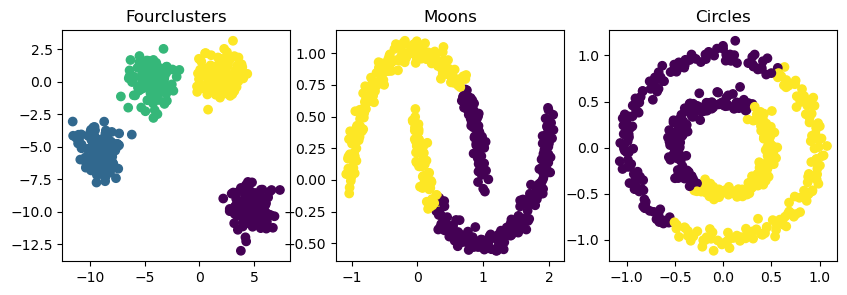

In [7]:
# Clustering visualization
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

ax[0].scatter(fourclusters[:, 0], fourclusters[:, 1], c=kmeans_fourclusters.labels_)
ax[1].scatter(moons[:, 0], moons[:, 1], c=kmeans_moons.labels_)
ax[2].scatter(circles[:, 0], circles[:, 1], c=kmeans_circles.labels_)

ax[0].set_title('Fourclusters')
ax[1].set_title('Moons')
ax[2].set_title('Circles')

__Question__: Is this the clustering that you would like to obtain? In which cases does KMeans work well? When it is not?

__Answer__: KMeans works well for the first dataset and regognizes four distinct clouds. On the second and the third datasets KMeans fail to cluster the points correctly.

#### Silhouette coefficient to find best `K`

Often, the exact number $K$ of clusters of the data is not known. However, we can still apply the KMeans algorithm and measure clustering performance to find the best $K$. One such metrics is known as **Silhouette coefficient**

The silhouette coefficient (or score) is used to **compare average distances within and between clusters** :

\begin{align}
\text{score} = \frac{b - a}{\max(a, b)}
\end{align}

where $a$ is the average intra-cluster distance and $b$ is the distance from a point to the nearest other cluster. The score is calculated per each observation (with a value between -1 and 1), then the average of this score is used to evaluate the clustering of the whole dataset.

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [8]:
from sklearn import metrics

In [9]:
print("Fourclusters: Silhouette coefficient for k-means (k=4) : %.2f" % 
      metrics.silhouette_score(fourclusters, kmeans_fourclusters.labels_))
print("Moons: Silhouette coefficient for k-means (k=2) : %.2f" % 
      metrics.silhouette_score(moons, kmeans_moons.labels_))
print("Circles: Silhouette coefficient for k-means (k=2) : %.2f" % 
      metrics.silhouette_score(circles, kmeans_circles.labels_))


Fourclusters: Silhouette coefficient for k-means (k=4) : 0.75
Moons: Silhouette coefficient for k-means (k=2) : 0.49
Circles: Silhouette coefficient for k-means (k=2) : 0.36


We will evaluate the clustering performance for $K$ in range [2, ...,10]

**FILL THE CODE IN THE NEXT CELL**

Dataset: Fourclusters
Optimal Silhouette coefficient : 0.75
Corresponding K: 4.00
Dataset: Moons
Optimal Silhouette coefficient : 0.53
Corresponding K: 10.00
Dataset: Circles
Optimal Silhouette coefficient : 0.41
Corresponding K: 10.00


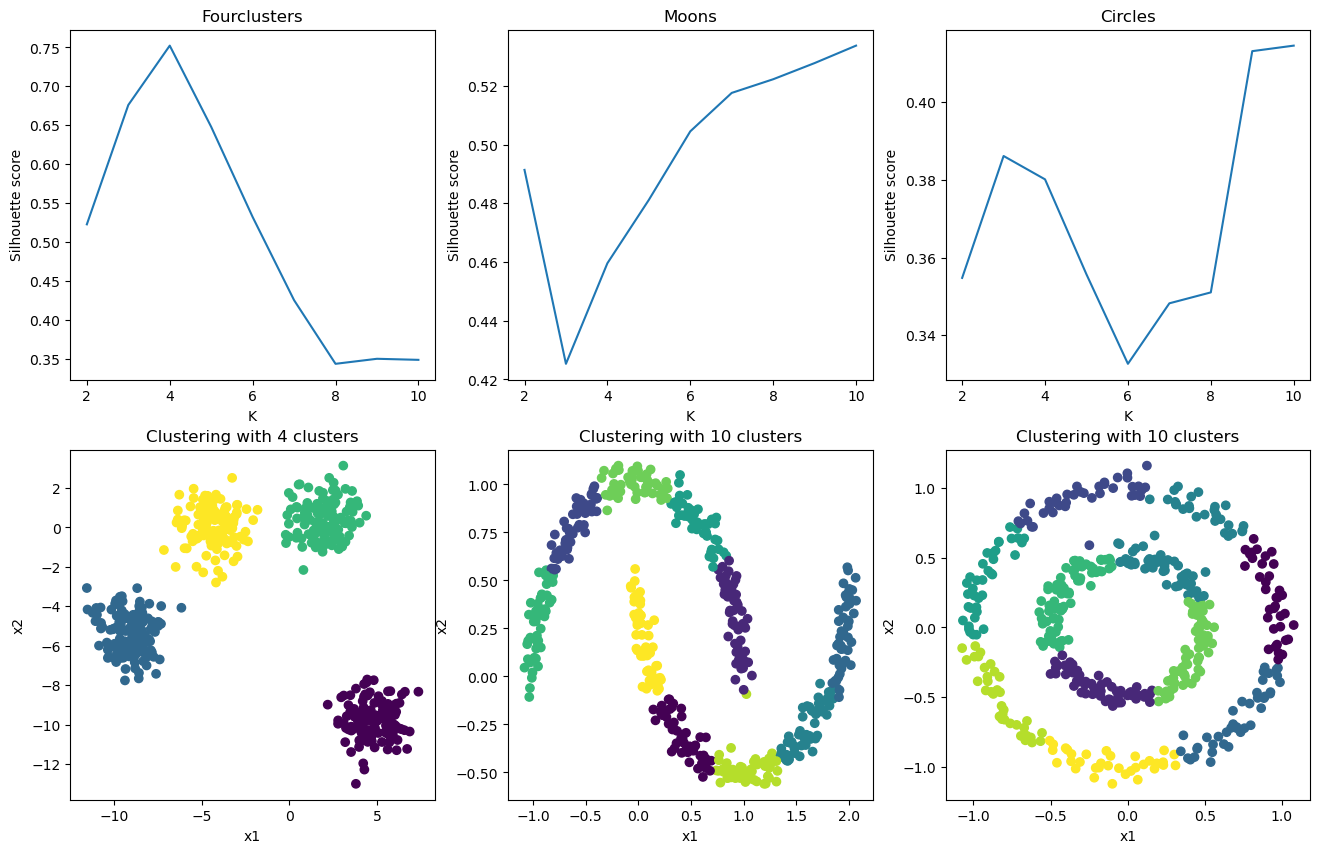

In [10]:
k_values = range(2, 11)
names = ['Fourclusters', 'Moons', 'Circles']
fig, ax = plt.subplots(2, 3, figsize=(16, 10))

for i, dataset in enumerate([fourclusters, moons, circles]):
    silhouettes = []
    
    for kval in k_values:
        ### START OF YOUR CODE
        # Initialize a KMeans model:
        kmeans_k = cluster.KMeans(n_clusters=kval)
        # Fit the KMeans model
        kmeans_k.fit(dataset)
        # Store the silhouette score into the array
        silhouettes.append(metrics.silhouette_score(dataset, kmeans_k.labels_))
        ### END OF YOUR CODE
    
    ax[0,i].plot(k_values, silhouettes)
    ax[0,i].set_xlabel("K")
    ax[0,i].set_ylabel("Silhouette score")
    ax[0,i].set_title(names[i])
    
    print("Dataset:", names[i])
    best_silhouette = np.max(silhouettes)
    print("Optimal Silhouette coefficient : %.2f" % best_silhouette)
    best_K = k_values[silhouettes.index(best_silhouette)]
    print("Corresponding K: %.2f" % best_K)
    
    
    kmeans_k = cluster.KMeans(n_clusters=best_K)
    kmeans_k.fit(dataset)
    ax[1,i].scatter(dataset[:, 0], dataset[:, 1], c=kmeans_k.labels_)
    ax[1,i].set_xlabel('x1')
    ax[1,i].set_ylabel('x2')
    ax[1,i].set_title('Clustering with ' + str(best_K) + ' clusters')

**Conclusion**: We have seen that KMeans have found an optimal solution for the *fourclusters* dataset, but have not produced good results for *moons* and *circles* dataset. Should we use other clustering algorithms?

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

The DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm works in two stages:
- All sufficiently close to each other observations are connected to each other.
- Observations with a minimum number of connected neighbors are considered *core samples*, from which clusters are extended. **All observations sufficiently close to a *core sample* belong to the same cluster as it**. 


Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

`eps` is the *neighborhood size*, i.e. maximum distance between two samples for one to be considered as in the neighborhood of the other.

`min_samples` is the number of samples in a neighborhood for a point to be considered as a core point.


**FILL THE CODE IN THE NEXT CELL**

In [11]:
### START OF YOUR CODE
# Initialize two DBSCAN models
# both with the parameters eps=0.2, min_samples=2:
dbscan_moons = cluster.DBSCAN(eps=0.2, min_samples=2) 
dbscan_circles = cluster.DBSCAN(eps=0.2, min_samples=2) 
### END OF YOUR CODE

# Fit the model to the data 
dbscan_moons.fit(moons)
dbscan_circles.fit(circles)

DBSCAN(eps=0.2, min_samples=2)

The `.labels_` attribute contains, for each observation, the cluster number to which that observation is assigned.

Display cluster labels:

In [12]:
print('Number of labels for moons dataset:', len(np.unique(dbscan_moons.labels_)))
print('Number of labels for circles dataset:', len(np.unique(dbscan_circles.labels_)))

Number of labels for moons dataset: 2
Number of labels for circles dataset: 2


Text(0.5, 1.0, 'Clustering DBSCAN (eps=0.2)')

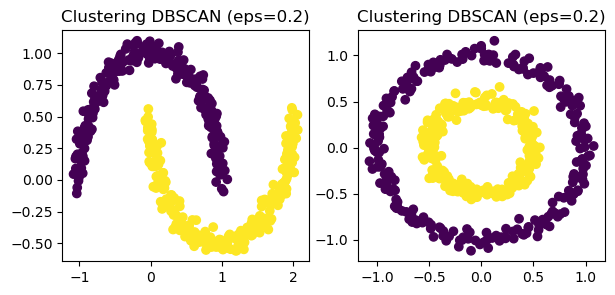

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))

ax[0].scatter(moons[:, 0], moons[:, 1], c=dbscan_moons.labels_)
ax[0].set_title("Clustering DBSCAN (eps=0.2)")

ax[1].scatter(circles[:, 0], circles[:, 1], c=dbscan_circles.labels_)
ax[1].set_title("Clustering DBSCAN (eps=0.2)")

####  Role of the neighborhood size parameter (`eps`)

We will evaluate the role of the parameter `eps` on the *Moons* dataset.

Let's check what happens if `eps` is too small:

**FILL THE CODE IN THE NEXT CELL**

In [15]:
# Initialize a DBSCAN model
### START OF YOUR CODE
# Try different small values of epsilon. How does this change clustering?
smalleps = 0.05
### END OF YOUR CODE
dbscan_smalleps = cluster.DBSCAN(eps=smalleps, min_samples=2)

# Fit the model to the data 
dbscan_smalleps.fit(moons)

DBSCAN(eps=0.05, min_samples=2)

In [16]:
print('Number of labels with small epsilon:', len(np.unique(dbscan_smalleps.labels_)))

Number of labels with small epsilon: 54


Let's plot the resulting clustering, with outliers (labeled as -1) marked by red stars.

Text(0.5, 1.0, 'Clustering DBSCAN (small epsilon)')

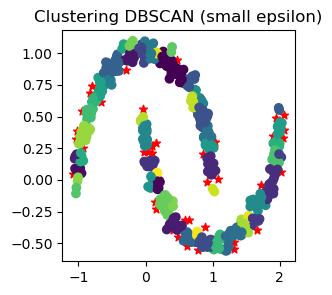

In [17]:
fig = plt.figure(figsize=(3, 3))

outliers = np.where(dbscan_smalleps.labels_ == -1)[0]
plt.scatter(moons[outliers, 0], moons[outliers, 1], marker='*', color='red')

non_outliers = np.where(dbscan_smalleps.labels_ != -1)[0]
plt.scatter(moons[non_outliers, 0], moons[non_outliers, 1], c=dbscan_smalleps.labels_[non_outliers])
plt.title("Clustering DBSCAN (small epsilon)")

Let's check what happens if `eps` is too big:

**FILL THE CODE IN THE NEXT CELL**

In [18]:
# Initialize a DBSCAN model
### START OF YOUR CODE
# Try different big values of epsilon. How does this change clustering?
bigeps = 2.0
### END OF YOUR CODE
dbscan_bigeps = cluster.DBSCAN(eps=bigeps, min_samples=2)

# Fit the model to the data 
dbscan_bigeps.fit(moons)

DBSCAN(eps=2.0, min_samples=2)

In [19]:
print('Number of labels with big epsilon:', len(np.unique(dbscan_bigeps.labels_)))

Number of labels with big epsilon: 1


Text(0.5, 1.0, 'Clustering DBSCAN (big epsilon)')

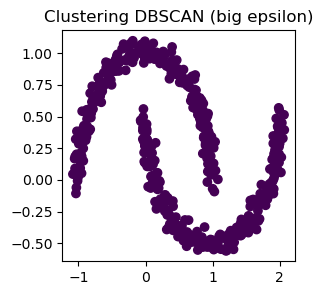

In [20]:
fig = plt.figure(figsize=(3, 3))
plt.scatter(moons[:, 0], moons[:, 1], c=dbscan_bigeps.labels_)
plt.title("Clustering DBSCAN (big epsilon)")

__Question__: How would you explain the role of the parameter `eps`?

__Answer__: `eps`corresponds to the maximum distance between two samples for one to be considered as in the neighborhood of the other. This means that value of `eps` strongly correlates with cluster sizes.

#### Silhouette coefficient to find best `eps`

Dataset: Moons
Optimal Silhouette coefficient : 0.33
Corresponding eps: 0.11
Dataset: Circles
Optimal Silhouette coefficient : 0.11
Corresponding eps: 0.22


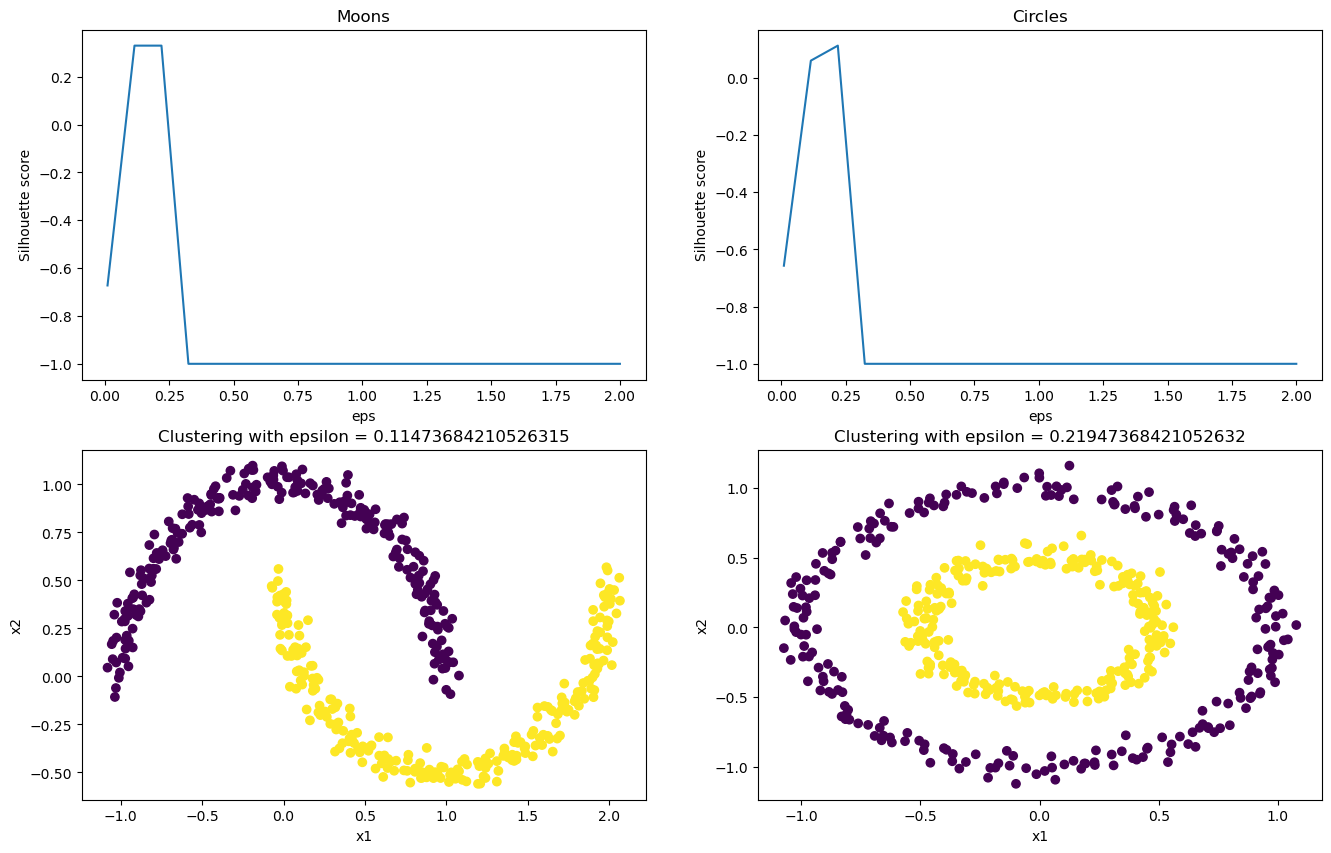

In [49]:
eps_values = np.linspace(0.01, 2, 20)
names = ['Moons', 'Circles']
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

for i, dataset in enumerate([moons, circles]):
    silhouettes = []
    
    for eps in eps_values:
        dbscan_eps = cluster.DBSCAN(eps=eps, min_samples=2)
        dbscan_eps.fit(dataset)
        if len(np.unique(dbscan_eps.labels_)) > 1: 
            silhouettes.append(metrics.silhouette_score(dataset, dbscan_eps.labels_))
        else:
            silhouettes.append(-1)
    
    ax[0,i].plot(eps_values, silhouettes)
    ax[0,i].set_xlabel("eps")
    ax[0,i].set_ylabel("Silhouette score")
    ax[0,i].set_title(names[i])
    
    print("Dataset:", names[i])
    best_silhouette = np.max(silhouettes)
    print("Optimal Silhouette coefficient : %.2f" % best_silhouette)
    best_eps = eps_values[silhouettes.index(best_silhouette)]
    print("Corresponding eps: %.2f" % best_eps)
    
    
    dbscan_eps = cluster.DBSCAN(eps=best_eps, min_samples=2)
    dbscan_eps.fit(dataset)
    ax[1,i].scatter(dataset[:, 0], dataset[:, 1], c=dbscan_eps.labels_)
    ax[1,i].set_xlabel('x1')
    ax[1,i].set_ylabel('x2')
    ax[1,i].set_title('Clustering with epsilon = ' + str(best_eps))


### Adjusted Rand Index

The Adjusted Rand Index (ARI) is used to **compare results of clustering with labels**. For each pair of observations, we check if they are in the same cluster or not, in both predicted and actual clustering. The ARI takes values between 0 (random clustering) and 1 (perfect clustering).

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

In [22]:
print("Moons dataset:")
print("Adjusted Rand Index of K-means (K=2) : %.2f" % 
      metrics.adjusted_rand_score(moons_labels, kmeans_moons.labels_))
print("Adjusted Rand Index of dbscan (eps=0.2) : %.2f" % 
      metrics.adjusted_rand_score(moons_labels, dbscan_moons.labels_))

Moons dataset:
Adjusted Rand Index of K-means (K=2) : 0.26
Adjusted Rand Index of dbscan (eps=0.2) : 1.00


In [23]:
print("Circles dataset:")
print("Adjusted Rand Index of K-means (K=2) : %.2f" % 
      metrics.adjusted_rand_score(circles_labels, kmeans_circles.labels_))
print("Adjusted Rand Index of dbscan (eps=0.2) : %.2f" % 
      metrics.adjusted_rand_score(circles_labels, dbscan_circles.labels_))

Circles dataset:
Adjusted Rand Index of K-means (K=2) : -0.00
Adjusted Rand Index of dbscan (eps=0.2) : 1.00


## Penguins dataset

Here we will work again with the **palmerpenguins** dataset used in notebook 4.

This dataset contains the characteristics of three species of penguins found on the Palmer Archipelago, off the northwest coast of the Antarctic Peninsula.

For more information, you can visit the website: https://allisonhorst.github.io/palmerpenguins/index.html

In [24]:
palmerpenguins = pd.read_csv("data/penguins_data.csv")

__Alternatively :__ If you need to download the file (e.g. on colab), uncomment and run the following two lines:

In [25]:
#!wget https://raw.githubusercontent.com/chagaz/cp-ia-intro-ml-2022/main/4-SVM/data/penguins_data.csv
#palmerpenguins = pd.read_csv("penguins_data.csv")

We will use all three labels but only two features, namely *bill_length_mm* and *body_mass_g*, and ignore the samples containing missing values.

In [26]:
palmerpenguins = palmerpenguins[palmerpenguins['bill_depth_mm'].notna()]
palmerpenguins = palmerpenguins.reset_index()

In [27]:
penguins_X = np.array(palmerpenguins[["bill_length_mm", "body_mass_g"]])

In [28]:
from sklearn import preprocessing

As the features have very different scales, we are going to standartise them. Further we encode species as integers.

**FILL THE CODE IN THE NEXT CELL**

In [29]:
### START OF YOUR CODE
# Standartise the features using preprocessing.StandardScaler()
penguins_X = preprocessing.StandardScaler().fit_transform(penguins_X)
### END OF YOUR CODE

In [30]:
species_names, species_int = np.unique(palmerpenguins.species, return_inverse=True)
penguins_labels = species_int

Text(0, 0.5, 'body_mass_g (standartised)')

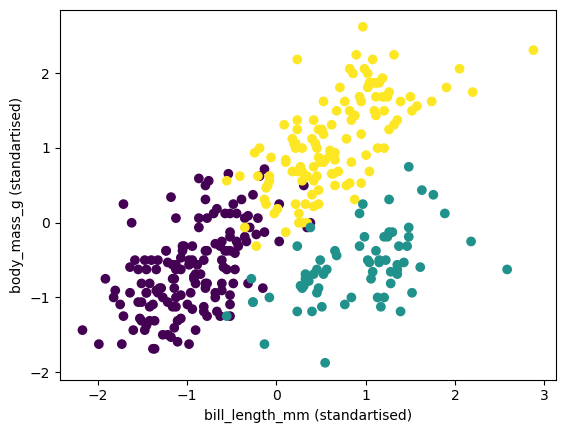

In [31]:
plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=penguins_labels)
plt.xlabel("bill_length_mm (standartised)")
plt.ylabel("body_mass_g (standartised)")

### KMeans

In [32]:
# initialize a KMeans model with three clusters
kmeans = cluster.KMeans(n_clusters=3)

# fit the model to the data
kmeans.fit(penguins_X)

KMeans(n_clusters=3)

Text(0, 0.5, 'body_mass_g (standartised)')

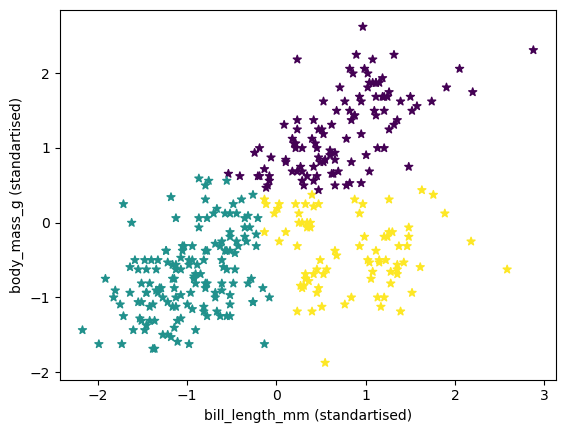

In [33]:
plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=kmeans.labels_, marker='*')


plt.xlabel("bill_length_mm (standartised)")
plt.ylabel("body_mass_g (standartised)")

**FILL THE CODE IN THE NEXT TWO CELLS**

In [34]:
### START OF YOUR CODE
# Calculate the silhouette score for this clustering
silhouette_penguins = metrics.silhouette_score(penguins_X, kmeans.labels_)
### END OF YOUR CODE
print("Silhouette coefficient for k-means (k=3) : %.2f" % silhouette_penguins)

Silhouette coefficient for k-means (k=3) : 0.47


In [50]:
### START OF YOUR CODE
# Calculate the Adjusted Rand Index for this clustering
ari_penguins = metrics.adjusted_rand_score(penguins_labels, kmeans.labels_)
### END OF YOUR CODE
print("Adjusted Rand Index for k-means (K=3) : %.2f" % ari_penguins)

Adjusted Rand Index for k-means (K=3) : 0.75


Optimal Silhouette coefficient : 0.48
Corresponding K: 2.00


Text(0.5, 1.0, 'Clustering with 2 clusters')

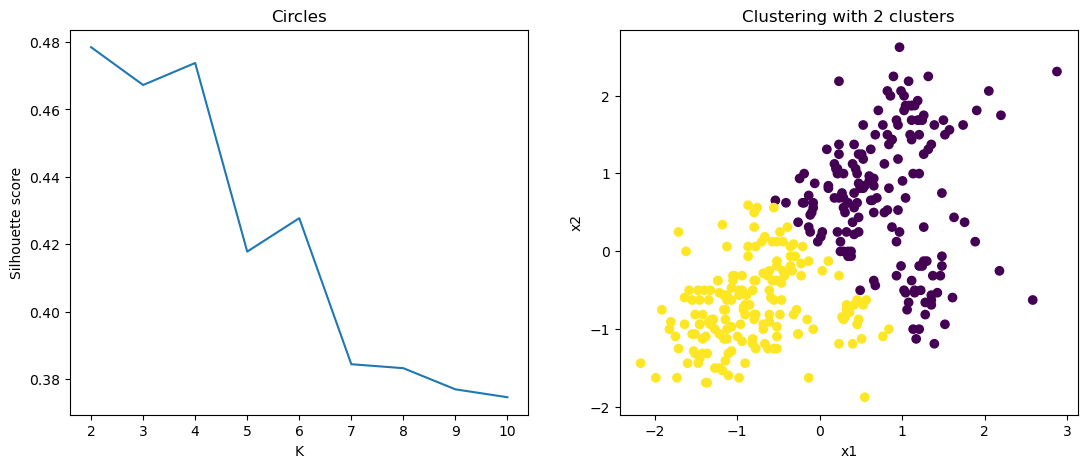

In [36]:
k_values = range(2, 11)
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

silhouettes = []
    
for kval in k_values:
    kmeans_k = cluster.KMeans(n_clusters=kval)
    kmeans_k.fit(penguins_X)
    silhouettes.append(metrics.silhouette_score(penguins_X, kmeans_k.labels_))
    
ax[0].plot(k_values, silhouettes)
ax[0].set_xlabel("K")
ax[0].set_ylabel("Silhouette score")
ax[0].set_title(names[i])
    
best_silhouette = np.max(silhouettes)
print("Optimal Silhouette coefficient : %.2f" % best_silhouette)
best_K = k_values[silhouettes.index(best_silhouette)]
print("Corresponding K: %.2f" % best_K)
    
    
kmeans_k = cluster.KMeans(n_clusters=best_K)
kmeans_k.fit(penguins_X)
ax[1].scatter(penguins_X[:, 0], penguins_X[:, 1], c=kmeans_k.labels_)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title('Clustering with ' + str(best_K) + ' clusters')

__Question__: Are you satisfied with the results? Which K is the best with regard to the Silhouette score? Is this what you expected?

__Answer__: The evaluation for Silhouette score indicates $K=2$ as the optimal number of clusters (while we expect 3). At the same time, clustering with $K=3$ gives quite good though not perfect results.

### DBSCAN

In [37]:
eps_values = np.linspace(0.01, 2, 30)
silhouettes = []

for eps in eps_values:
    dbscan_eps = cluster.DBSCAN(eps=eps, min_samples=2)
    dbscan_eps.fit(penguins_X)
    if len(np.unique(dbscan_eps.labels_)) > 1: # required to calculate the Silhouette coefficient
        silhouettes.append(metrics.silhouette_score(penguins_X, dbscan_eps.labels_))
    else:
        silhouettes.append(-1)

Text(0, 0.5, 'silhouette')

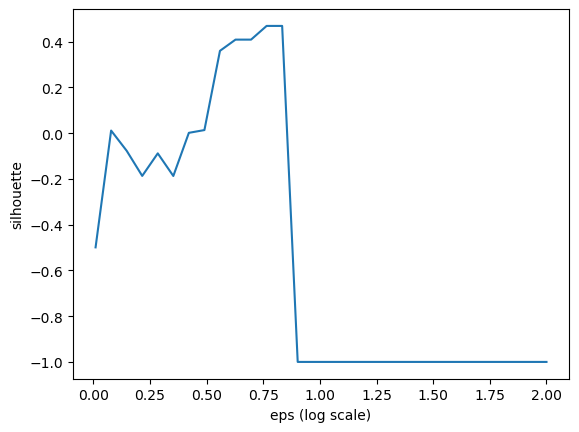

In [38]:
plt.plot(eps_values, silhouettes)
plt.xlabel("eps (log scale)")
plt.ylabel("silhouette")

In [39]:
best_silhouette = np.max(silhouettes)
print("Optimal value of Silhouette coefficient: %.2f" % best_silhouette)
best_eps = eps_values[silhouettes.index(best_silhouette)]
print("Corresponding value of Eps: %.2f" % best_eps)

Optimal value of Silhouette coefficient: 0.47
Corresponding value of Eps: 0.76


In [40]:
dbscan_opt = cluster.DBSCAN(eps=best_eps, min_samples=2)
dbscan_opt.fit(penguins_X)

DBSCAN(eps=0.7648275862068966, min_samples=2)

Display cluster labels:

In [41]:
np.unique(dbscan_opt.labels_)

array([-1,  0])

In [42]:
print("Silhouette coefficient for DBSCAN: %.2f" % metrics.silhouette_score(penguins_X, dbscan_opt.labels_))
print("Adjusted Rand Index for DBSCAN: %.2f" % metrics.adjusted_rand_score(penguins_labels, dbscan_opt.labels_))

Silhouette coefficient for DBSCAN: 0.47
Adjusted Rand Index for DBSCAN: 0.00


Text(0, 0.5, 'body_mass_g (standartised)')

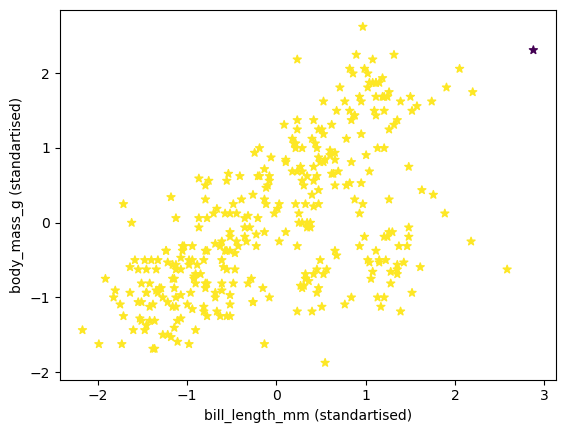

In [43]:
plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=dbscan_opt.labels_, marker='*')


plt.xlabel("bill_length_mm (standartised)")
plt.ylabel("body_mass_g (standartised)")

__Question__: How many clusters has DBSCAN found? How do you think, why?

__Answer__:

### Gaussian Mixture Model

The Gaussian mixture model seeks to **optimize the parameters of a finite number of Gaussians** to the data. 

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [44]:
from sklearn import mixture

In [45]:
# Initialize a Gaussian mixture model with n_components=3
gmm = mixture.GaussianMixture(n_components=3)

# Fit the model to the data 
gmm.fit(penguins_X)

# Predict clusters
gmm_labels = gmm.predict(penguins_X)

Text(0, 0.5, 'body_mass_g (standartised)')

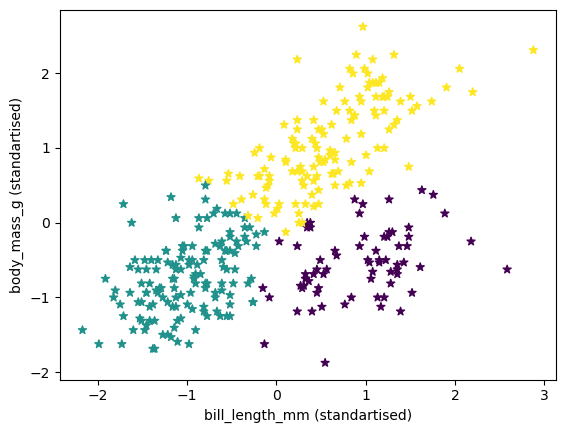

In [46]:
#plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=penguins_labels, marker='o')
plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=gmm_labels, marker='*')


plt.xlabel("bill_length_mm (standartised)")
plt.ylabel("body_mass_g (standartised)")

In [47]:
print("Silhouette coefficient for GMM (k=3): %.2f" % metrics.silhouette_score(penguins_X, gmm_labels))

Silhouette coefficient for GMM (k=3): 0.47


In [48]:
print("Adjusted Rand Index for GMM (K=3): %.2f" % metrics.adjusted_rand_score(penguins_labels, gmm_labels))

Adjusted Rand Index for GMM (K=3): 0.79


__Question__: For penguins dataset, which model has the best Silhouette score? Which model has the best Adjusted Rand Index? Looking into the plots, which model do you find the best? 

__Answer__: All models have equal (0.47) Silhouette scores. Adjusted Rand Index is the best for the Gaussian Mixture Model. This model visually looks also the most plausible. 

#### Extra task for GMMs

You can run Gaussian Mixture Models with different value of the `n_components`parameter and evaluate them with Silhouette score and/or Adjusted Rand Index.